## Mirror Data Generator
- mirrorGen is an open source tool to generate synthetic data based on a correlation DAG, which describes the relation among the columns in the data. It can be used to produce "dirty" data, mirroring various bias in real life, which can be used in applications, such as classification and ranking tasks [[1]](https://arxiv.org/abs/2006.08688).

## Demo the usage of mirrorGen to generate data that is described by the DAG below.
- It simulate a dataset with 6 columns: 
    - G with values of 'M' and 'F' and each value has a probability of 0.5 to appear, i.e., 50% is M and 50% is F. 
    - U with values from a Pareto distribution with P(2.0, 1.0) for shape and scale respectively.
- The correlation among above columns are:
    - X is determined by G and U with weights of 0.2 and 0.8 respectively.
    - Y is determined by G and X with weights of 0.4 and 0.6 respectively.

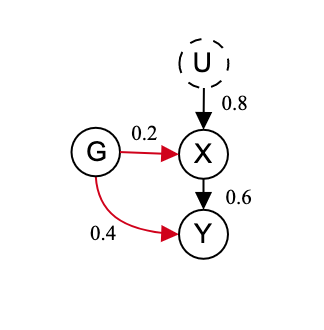

In [1]:
from IPython import display
display.Image('dag_pareto.png', width = 200, height = 150)

In [2]:
from mirror.nodes import *
from mirror.edges import *
from mirror.generator import Mirror
import pandas as pd

### 1. Define the DAG and generate data

In [4]:
# name of folder to save the synthetic data
data_flag = "pareto"

# size of the data
total_n = 2000 

# initialize nodes
node_g = CategoricalNode("G", {"M": 0.5, "F": 0.5}, sample_n=total_n)

node_u = ParetoNode("U", sample_n=total_n, shape=2.0, scale=1.0) # an unobserved pareto node
node_x = ParetoNode("X")
node_y = ParetoNode("Y")

edge_g_x = CtoN("G", "X", {"M": ["Pareto", 3.0, 1.0], "F": ["Pareto", 1.0, 1.0]})
edge_g_y = CtoN("G", "Y", {"M": ["Pareto", 3.0, 1.0], "F": ["Pareto", 2.0, 1.0]})

edge_u_x = NtoNLinear("U", "X")
edge_x_y = NtoNLinear("X", "Y")

# define DAG
nodes = [node_g, node_u, node_x, node_y]
edge_relations = {"X": ([edge_g_x, edge_u_x], [0.2, 0.8]),
                  "Y": ([edge_g_y, edge_x_y], [0.4, 0.6])}


# generate data
mirror = Mirror(seed=0)
mirror.generate_csv(nodes, edge_relations)
mirror.save_to_disc("out/"+data_flag+"/R1.csv")

print()

G independet ['G']
----------------------------------------

U independet ['G', 'U']
----------------------------------------

X with parents
----------------------------------------

Y with parents
----------------------------------------

--> Generated data is saved to  out/pareto/R1.csv 


